In [31]:
"""
Loss Function for Classification
For Binary-Class Classification
    Logistic Loss Function/Binary Cross-Entropy Loss Function
        if target == 1:
            -log(probability)
        else if target == 0:
            -log(1-probability)

For Multi-Class Classification
    Cross-Entropy Loss Function
"""

'\nLoss Function for Classification\nFor Binary-Class Classification\n    Logistic Loss Function/Binary Cross-Entropy Loss Function\n        if target == 1:\n            -log(probability)\n        else if target == 0:\n            -log(1-probability)\n\nFor Multi-Class Classification\n    Cross-Entropy Loss Function\n'

In [6]:
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [1]:
import pandas as pd
fish = pd.read_csv("https://bit.ly/fish_csv_data")

In [5]:
fish_unique = pd.unique(fish["Species"])
print(fish_unique)

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [14]:
fish_input = fish[["Weight", "Length", "Diagonal", "Height", "Width"]].to_numpy()
fish_target = fish["Species"].to_numpy()

# fish_input = fish[["Weight", "Length", "Diagonal", "Height", "Width"]]
# fish_target = fish["Species"]

In [28]:
# split the data into train and test
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state = 42)

In [30]:
# pre-processing
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled_input = ss.transform(train_input)
test_scaled_input = ss.transform(test_input)

In [38]:
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss="log_loss", max_iter=10, random_state=42)
sc.fit(train_scaled_input, train_target)
print(sc.score(train_scaled_input, train_target))
print(sc.score(test_scaled_input, test_target))

0.773109243697479
0.775


/home/joe/ML_DL/ai/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [40]:
sc.partial_fit(train_scaled_input, train_target)
print(sc.score(train_scaled_input, train_target))
print(sc.score(test_scaled_input, test_target))

0.8151260504201681
0.85


In [42]:
# Early Stopping: stopping training before the point of overfitting
import numpy as np
sc = SGDClassifier(loss="log_loss", random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)

In [50]:
import numpy as np
sc = SGDClassifier(loss="log_loss", random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)

In [51]:
for _ in range(300):
    sc.partial_fit(train_scaled_input, train_target, classes=classes)
    train_score.append(sc.score(train_scaled_input, train_target))
    test_score.append(sc.score(test_scaled_input, test_target))

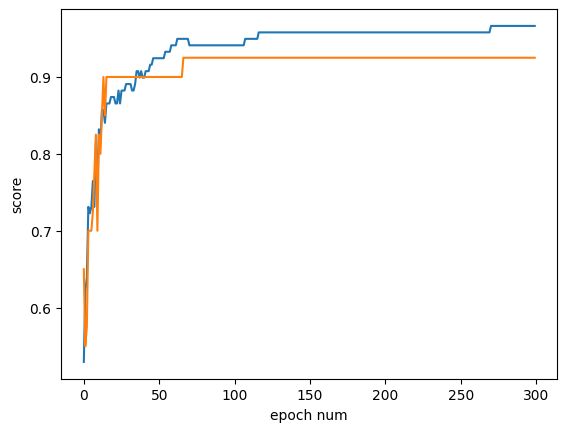

In [52]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch num')
plt.ylabel('score')
plt.show()

In [53]:
sc = SGDClassifier(loss = "log_loss", max_iter = 100, tol = None, random_state = 42)
sc.fit(train_scaled_input, train_target)
print(sc.score(train_scaled_input, train_target))
print(sc.score(test_scaled_input, test_target))

0.957983193277311
0.925


In [55]:
sc = SGDClassifier(loss = "log_loss", max_iter = 100, random_state = 42)
sc.fit(train_scaled_input, train_target)
print(sc.score(train_scaled_input, train_target))
print(sc.score(test_scaled_input, test_target))

0.8403361344537815
0.8


In [56]:
sc = SGDClassifier(loss="hinge", max_iter=100, tol=None, random_state = 42)
sc.fit(train_scaled_input, train_target)
print(sc.score(train_scaled_input, train_target))
print(sc.score(test_scaled_input, test_target))

0.9495798319327731
0.925
